#2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ
<h3>Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις τεχνικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες επιπρόσθετες, με στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [1]:
%matplotlib inline
import itertools
import matplotlib
import numpy as np
import scipy as sp
import collections
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from numpy.linalg import matrix_power
from sklearn.cluster import SpectralClustering

##Α. Μελέτη πραγματικών τοπολογιών
<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων και της πολυπλοκότητας ανάλυσης που ανακύπτει. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Ο βαθμός κάθε κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Ο συντελεστής ομαδοποίησης κάθε κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Την ενδιαμεσική εγώκεντρικότητα κάθε κόμβου και τη μέση ενδιαμεσική εγωκεντρικότητα.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>
<p style=text-align:justify><b>Προσοχή!</b> Θα πρέπει να ελέγξετε αν οι γράφοι είναι κατευθυνόμενοι, δηλ. οι αντίστοιχοι πίνακες γειτνίασης είναι μη συμμετρικοί. Στην περίπτωση αυτή, θα πρέπει να τους μετατρέψετε σε μη-κατευθυνόμενους με τουλάχιστον το ίδιο πλήθος συνδέσεων, <b>προτού</b> εφαρμόσετε τους αλγόριθμους εντοπισμού κοινοτήτων του <b>πίνακα 2</b>. </p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες από την ιστοσελίδα <a style=text-decoration:none href="http://www-personal.umich.edu/~mejn/netdata/">http://www-personal.umich.edu/~mejn/netdata/</a> </caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>
<tr>
    <td style=text-align:left>Les Miserables</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/lesmis.zip'>lesmis.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>lesmis.gml</b> contains the weighted network of coappearances of
characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993)</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Dolphin social network</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/dolphins.zip'>dolphins.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>dolphins.gml</b> contains an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand, as compiled by Lusseau et al. (2003)</p>
    </td>
</tr> 
</table>

###1 . Παραγωγή συνθετικών τοπολογιών

In [2]:
# A.M.:03116067 άρα x=7 (n=1x0)
n=170
d=4
M=750
R=0.15
p=0.3
k=4

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)

#we need to ensure connectivity for spectral clustering to work
RGG = nx.random_geometric_graph(n, R)
while nx.is_connected(RGG)==False:
    RGG = nx.random_geometric_graph(n, R)
    
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n,k,p)

###2 . Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.

In [3]:
#import football.gml from local file using nx.read_gml
football = nx.read_gml('football.gml')

In [4]:
#check if football is directed
nx.is_directed(football)

False

<function matplotlib.pyplot.show>

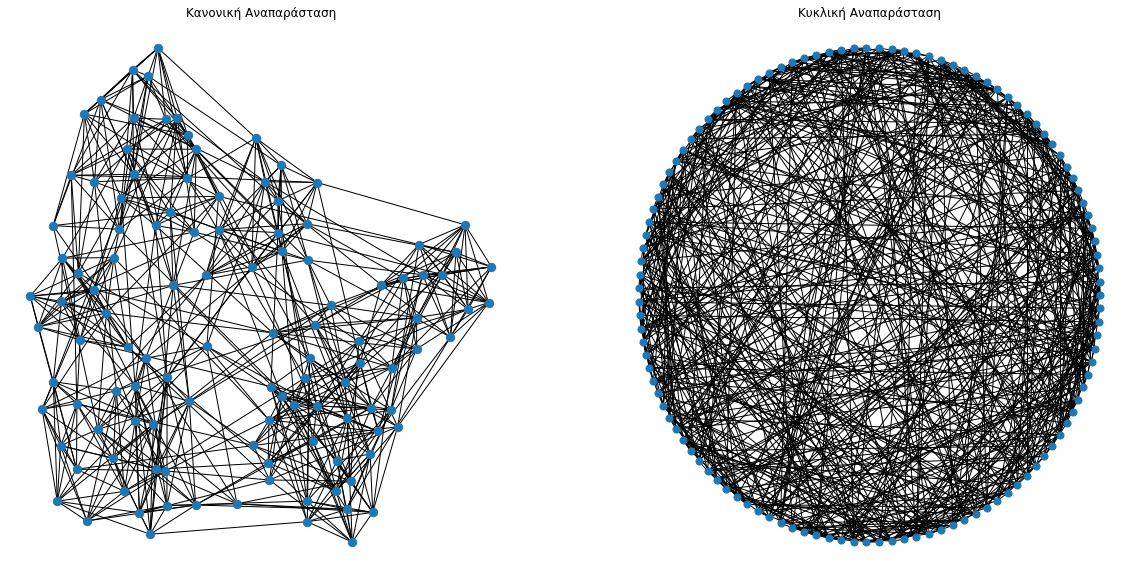

In [5]:
#visualize football
fig, axs = plt.subplots(1,2,figsize=(20,10))
nx.draw(football,node_size=70,ax=axs[0])
axs[0].set_title("Κανονική Αναπαράσταση")
nx.draw_circular(football,node_size=50,ax=axs[1])
axs[1].set_title("Κυκλική Αναπαράσταση")
plt.show

In [6]:
#import lesmis.gml from local file
lesmis = nx.read_gml('lesmis.gml')

In [7]:
#check if lesmis is directed
nx.is_directed(lesmis)

False

<function matplotlib.pyplot.show>

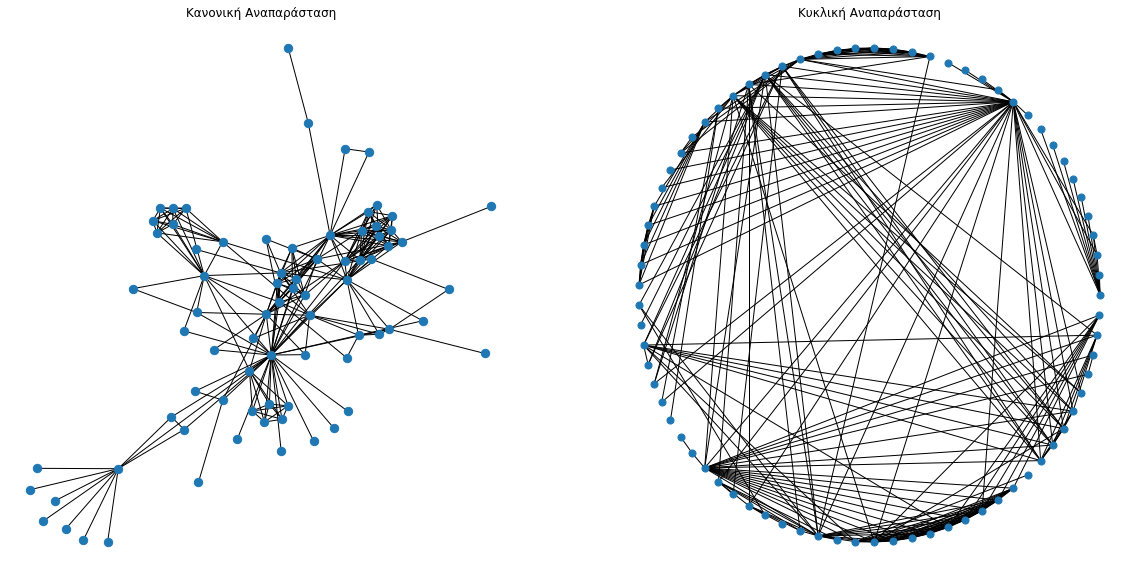

In [8]:
#visualize lesmis
fig, axs = plt.subplots(1,2,figsize=(20,10))
nx.draw(lesmis,node_size=70,ax=axs[0])
axs[0].set_title("Κανονική Αναπαράσταση")
nx.draw_circular(lesmis,node_size=50,ax=axs[1])
axs[1].set_title("Κυκλική Αναπαράσταση")
plt.show

In [9]:
#import dolphins.gml from local file
dolphins = nx.read_gml('dolphins.gml')

In [10]:
#check if dolphins is directed
nx.is_directed(dolphins)

False

<function matplotlib.pyplot.show>

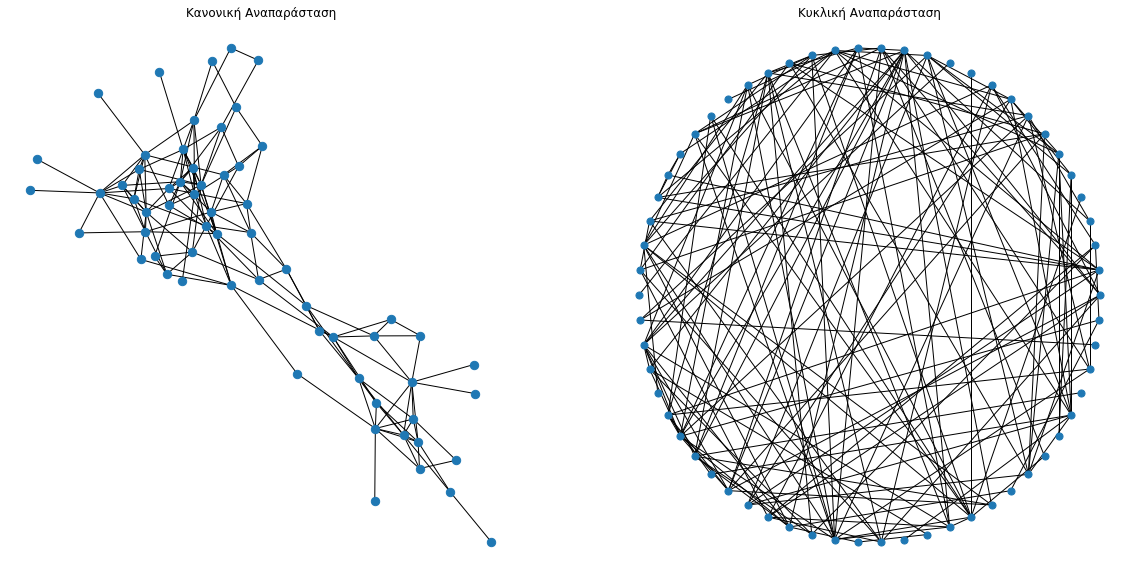

In [11]:
#visualize dolphins
fig, axs = plt.subplots(1,2,figsize=(20,10))
nx.draw(dolphins,node_size=70,ax=axs[0])
axs[0].set_title("Κανονική Αναπαράσταση")
nx.draw_circular(dolphins,node_size=50,ax=axs[1])
axs[1].set_title("Κυκλική Αναπαράσταση")
plt.show

In [12]:
#convert nodes' labels from strings to integers in real topologies
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

nfootball,football_map=conv2int(football,0)
nlesmis, lesmis_map=conv2int(lesmis,0)
ndolphins, dolphins_map=conv2int(dolphins,0)

football=nx.relabel_nodes(nfootball,football_map)
lesmis=nx.relabel_nodes(nlesmis,lesmis_map)
dolphins=nx.relabel_nodes(ndolphins,dolphins_map)

###3 . Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.

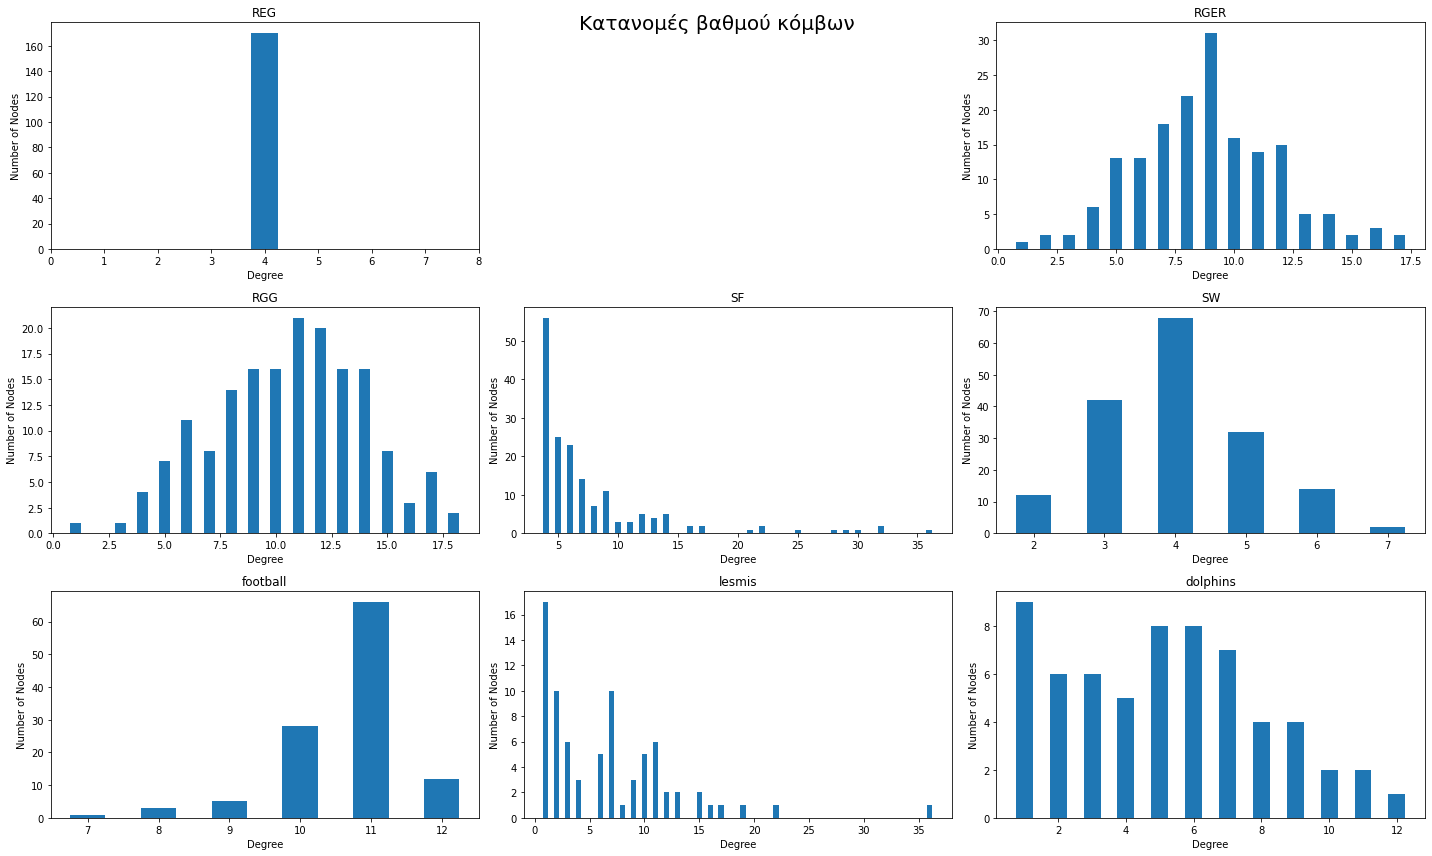

In [13]:
# Συνάρτηση που παίρνει σαν όρισμα έναν γράφο και 
# επιστρέφει μια λίστα n στοιχείων με τους βαθμούς κάθε κόμβου.
def find_degree(G): 
  res = nx.degree(G)
  return [i[1] for i in res]

# Συνάρτηση που παίρνει σαν όρισμα την λίστα βαθμών κόμβων και
# επιστρέφει μετρικές για την κατανομή και την συγκεντρωτική κατανομή.
# Θα χρησιμοποιηθεί παρακάτω και για άλλες κατανομές εκτός της degree.
def plot_distribution(G_degree):
  degree_count = collections.Counter(G_degree)
  degree_count_sorted = sorted(degree_count.items(), key=lambda pair: pair[0], reverse=False)
  deg, cnt = zip(*degree_count_sorted)
  cnt_cumsum = np.cumsum(cnt)
  cnt_cumsum = cnt_cumsum/max(cnt_cumsum)
  return (deg, cnt, cnt_cumsum)

REG_degree = find_degree(REG)
RGER_degree = find_degree(RGER)
RGG_degree = find_degree(RGG)
SF_degree = find_degree(SF)
SW_degree = find_degree(SW)
football_degree = find_degree(football)
lesmis_degree = find_degree(lesmis)
dolphins_degree = find_degree(dolphins)

#Διαγράμματα Κατανομής Βαθμού κόμβων
fig, axs = plt.subplots(3,3,figsize=(20,12))
fig.suptitle("Κατανομές βαθμού κόμβων",fontsize = 20)

(a1,b1,c1) = plot_distribution(REG_degree)
axs[0,0].bar(a1, b1, width=0.5)
axs[0,0].set_xlim(0,8)
axs[0,0].set_title("REG")
axs[0,0].set_xlabel('Degree')
axs[0,0].set_ylabel('Number of Nodes')

(a2,b2,c2) = plot_distribution(RGER_degree)
axs[0,2].bar(a2, b2, width=0.5)
axs[0,2].set_title("RGER")
axs[0,2].set_xlabel('Degree')
axs[0,2].set_ylabel('Number of Nodes')

(a3,b3,c3) = plot_distribution(RGG_degree)
axs[1,0].bar(a3, b3, width=0.5)
axs[1,0].set_title("RGG")
axs[1,0].set_xlabel('Degree')
axs[1,0].set_ylabel('Number of Nodes')

(a4,b4,c4) = plot_distribution(SF_degree)
axs[1,1].bar(a4, b4, width=0.5)
axs[1,1].set_title("SF")
axs[1,1].set_xlabel('Degree')
axs[1,1].set_ylabel('Number of Nodes')

(a5,b5,c5) = plot_distribution(SW_degree)
axs[1,2].bar(a5, b5, width=0.5)
axs[1,2].set_title("SW")
axs[1,2].set_xlabel('Degree')
axs[1,2].set_ylabel('Number of Nodes')

(a6,b6,c6) = plot_distribution(football_degree)
axs[2,0].bar(a6, b6, width=0.5)
axs[2,0].set_title("football")
axs[2,0].set_xlabel('Degree')
axs[2,0].set_ylabel('Number of Nodes')

(a5,b5,c5) = plot_distribution(lesmis_degree)
axs[2,1].bar(a5, b5, width=0.5)
axs[2,1].set_title("lesmis")
axs[2,1].set_xlabel('Degree')
axs[2,1].set_ylabel('Number of Nodes')

(a5,b5,c5) = plot_distribution(dolphins_degree)
axs[2,2].bar(a5, b5, width=0.5)
axs[2,2].set_title("dolphins")
axs[2,2].set_xlabel('Degree')
axs[2,2].set_ylabel('Number of Nodes')

axs[0,1].axis('off')
fig.tight_layout()

In [14]:
# Υπολογισμός μέσου βαθμού κόμβου για κάθε μια τοπολογία
mean_degree_REG = np.mean(REG_degree)
mean_degree_RGER = np.mean(RGER_degree)
mean_degree_RGG = np.mean(RGG_degree)
mean_degree_SF = np.mean(SF_degree)
mean_degree_SW = np.mean(SW_degree)
mean_degree_football = np.mean(football_degree)
mean_degree_lesmis = np.mean(lesmis_degree)
mean_degree_dolphins = np.mean(dolphins_degree)

# Εκτύπωση μέσου βαθμού κόμβου
print("Μέσος Βαθμός Κόμβου για REG: ",mean_degree_REG)
print("Μέσος Βαθμός Κόμβου για RGER:",mean_degree_RGER)
print("Μέσος Βαθμός Κόμβου για RGG: ",mean_degree_RGG)
print("Μέσος Βαθμός Κόμβου για SF:  ",mean_degree_SF)
print("Μέσος Βαθμός Κόμβου για SW:  ",mean_degree_SW)
print("")
print("Μέσος Βαθμός Κόμβου για football:",mean_degree_football)
print("Μέσος Βαθμός Κόμβου για lesmis:  ",mean_degree_lesmis)
print("Μέσος Βαθμός Κόμβου για dolphins:",mean_degree_dolphins)

Μέσος Βαθμός Κόμβου για REG:  4.0
Μέσος Βαθμός Κόμβου για RGER: 8.823529411764707
Μέσος Βαθμός Κόμβου για RGG:  10.6
Μέσος Βαθμός Κόμβου για SF:   7.811764705882353
Μέσος Βαθμός Κόμβου για SW:   4.0

Μέσος Βαθμός Κόμβου για football: 10.660869565217391
Μέσος Βαθμός Κόμβου για lesmis:   6.597402597402597
Μέσος Βαθμός Κόμβου για dolphins: 5.129032258064516


<u>Σύγκριση πραγματικών με συνθετικών κατανομών</u>

*   **football**: Παρατηρούμε ότι οι περισσότεροι κόμβοι έχουν βαθμό 11, και μερικοί λιγότεροι βαθμό 10 και 12. Ελάχιστοι κόμβοι έχουν βαθμό από 9 μέχρι 7. Ο μέσος βαθμός κόμβου είναι κι αυτός δηλαδή κοντά σε αυτές τις κεντρικές τιμές (10.66). Συγκρίνοντας τη γραφική του football με των συνθετικών βλέπουμε ότι "ταιριάζει" καλύτερα με τον REG και λίγο λιγότερο με τον SW. (Παρόλο που δεν μοιάζει τόσο πολύ με heavy-tailed).

*   **lesmis**: Παρατηρούμε ότι οι περισσότεροι κόμβοι έχουν χαμηλό βαθμό και λίγοι κόμβοι έχουν υψηλό. Η μορφή της γραφικής παράστασης δηλαδή μοιάζει πολύ με του Scale Free δικτύου (power-law).

*   **dolphins**: Παρατηρούμε ότι η κατανομή βαθμών κόμβου είναι ομοιόμορφη χωρίς τόσο εμφανή μέγιστη τιμή. Θυμίζει περισσότερο την uniform degree distibution του RGG δικτύου και λίγο λιγότερο την κατανομή του RGER.





###4 . Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες

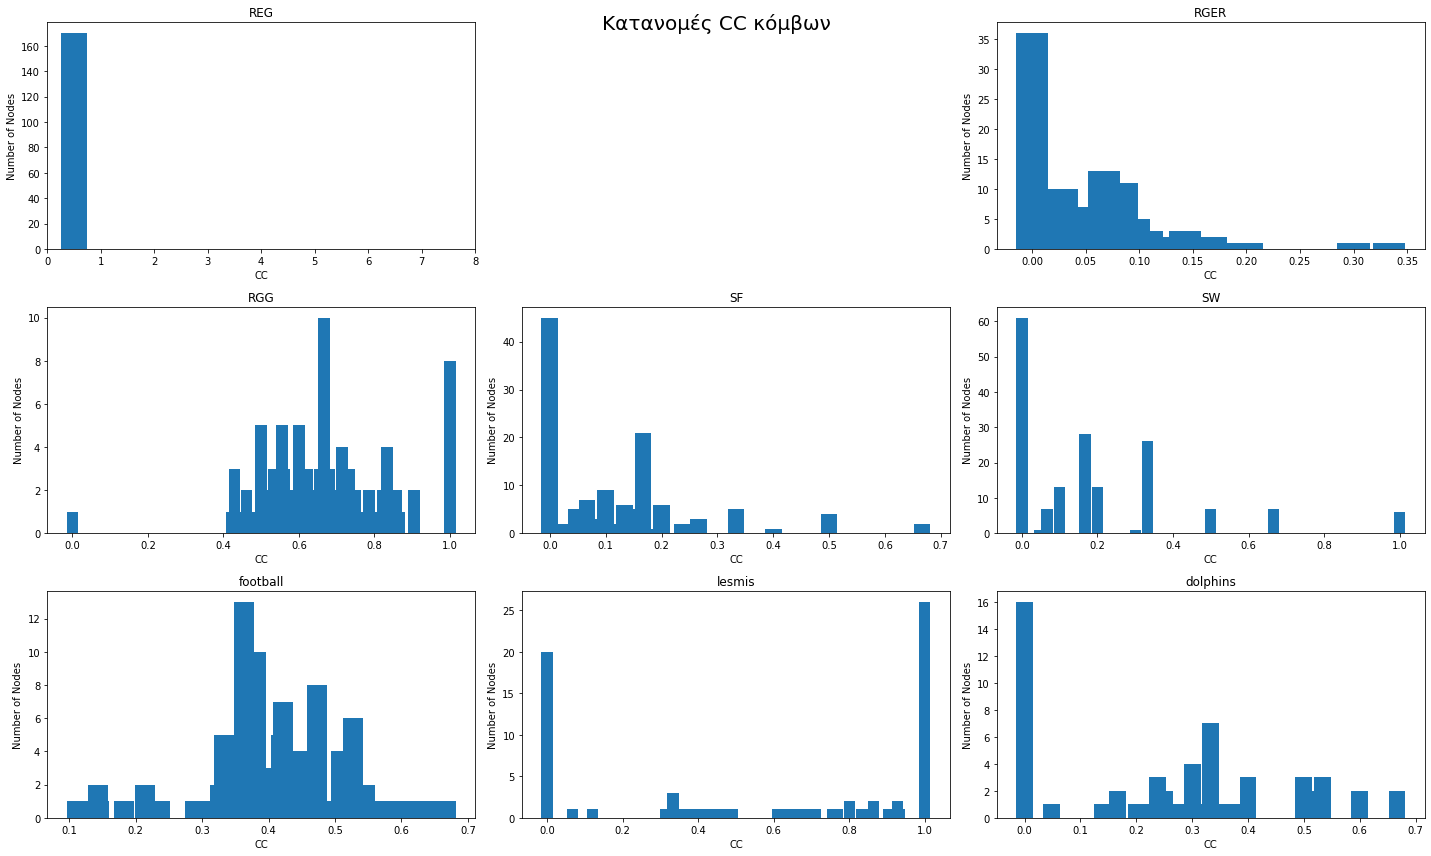

In [15]:
# Συνάρτηση που επιστρέφει μια λίστα με τα τοπικά ΣΟ για κάθε κόμβο του γράφου G.
def clust_coef(G):
  return list(nx.clustering(G).values())

# Η συνάρτηση αυτή είναι ιδια με την προηγούμενη που χρησιμοποιήσαμε στο 3ο ερώτημα με την μόνη
# διαφορά ότι τώρα θα πάρει σαν είσοδο τα G_cc αντί για τα G_degree.

def plot_distribution(G_cc):
  degree_count = collections.Counter(G_cc)
  degree_count_sorted = sorted(degree_count.items(), key=lambda pair: pair[0], reverse=False)
  deg, cnt = zip(*degree_count_sorted)
  cnt_cumsum = np.cumsum(cnt)
  cnt_cumsum = cnt_cumsum/max(cnt_cumsum)
  return (deg, cnt, cnt_cumsum)

REG_cc = clust_coef(REG)
RGER_cc = clust_coef(RGER)
RGG_cc = clust_coef(RGG)
SF_cc = clust_coef(SF)
SW_cc = clust_coef(SW)
football_cc = clust_coef(football)
lesmis_cc = clust_coef(lesmis)
dolphins_cc = clust_coef(dolphins)

#Διαγράμματα Κατανομής CC
fig, axs = plt.subplots(3,3,figsize=(20,12))
fig.suptitle("Κατανομές CC κόμβων",fontsize = 20)

(a1,b1,c1) = plot_distribution(REG_cc)
axs[0,0].bar(a1, b1, width=0.5)
axs[0,0].set_xlim(0,8)
axs[0,0].set_title("REG")
axs[0,0].set_xlabel('CC')
axs[0,0].set_ylabel('Number of Nodes')

(a2,b2,c2) = plot_distribution(RGER_cc)
axs[0,2].bar(a2, b2, width=0.03)
axs[0,2].set_title("RGER")
axs[0,2].set_xlabel('CC')
axs[0,2].set_ylabel('Number of Nodes')

(a3,b3,c3) = plot_distribution(RGG_cc)
axs[1,0].bar(a3, b3, width=0.03)
axs[1,0].set_title("RGG")
axs[1,0].set_xlabel('CC')
axs[1,0].set_ylabel('Number of Nodes')

(a4,b4,c4) = plot_distribution(SF_cc)
axs[1,1].bar(a4, b4, width=0.03)
axs[1,1].set_title("SF")
axs[1,1].set_xlabel('CC')
axs[1,1].set_ylabel('Number of Nodes')

(a5,b5,c5) = plot_distribution(SW_cc)
axs[1,2].bar(a5, b5, width=0.03)
axs[1,2].set_title("SW")
axs[1,2].set_xlabel('CC')
axs[1,2].set_ylabel('Number of Nodes')

(a6,b6,c6) = plot_distribution(football_cc)
axs[2,0].bar(a6, b6, width=0.03)
axs[2,0].set_title("football")
axs[2,0].set_xlabel('CC')
axs[2,0].set_ylabel('Number of Nodes')

(a5,b5,c5) = plot_distribution(lesmis_cc)
axs[2,1].bar(a5, b5, width=0.03)
axs[2,1].set_title("lesmis")
axs[2,1].set_xlabel('CC')
axs[2,1].set_ylabel('Number of Nodes')

(a5,b5,c5) = plot_distribution(dolphins_cc)
axs[2,2].bar(a5, b5, width=0.03)
axs[2,2].set_title("dolphins")
axs[2,2].set_xlabel('CC')
axs[2,2].set_ylabel('Number of Nodes')

axs[0,1].axis('off')
fig.tight_layout()

In [16]:
# Υπολογισμός μέσου ΣΟ κάθε τοπολογίας
mean_cc_REG = np.mean(REG_cc)
mean_cc_RGER = np.mean(RGER_cc)
mean_cc_RGG = np.mean(RGG_cc)
mean_cc_SF = np.mean(SF_cc)
mean_cc_SW = np.mean(SW_cc)
mean_cc_football = np.mean(football_cc)
mean_cc_lesmis = np.mean(lesmis_cc)
mean_cc_dolphins = np.mean(dolphins_cc)

# Εκτυπώνουμε τον μέσο ΣΟ κάθε τοπολογίας
print("Mean clustering coefficient REG: ",mean_cc_REG)
print("Mean clustering coefficient RGER:",mean_cc_RGER)
print("Mean clustering coefficient RGG: ",mean_cc_RGG)
print("Mean clustering coefficient SF:  ",mean_cc_SF)
print("Mean clustering coefficient SW:  ",mean_cc_SW)
print("")
print("Mean clustering coefficient football:",mean_cc_football)
print("Mean clustering coefficient lesmis:  ",mean_cc_lesmis)
print("Mean clustering coefficient dolphins:",mean_cc_dolphins)

Mean clustering coefficient REG:  0.5
Mean clustering coefficient RGER: 0.055618451137482275
Mean clustering coefficient RGG:  0.6413848195249578
Mean clustering coefficient SF:   0.10849424938875732
Mean clustering coefficient SW:   0.18949579831932772

Mean clustering coefficient football: 0.40321601104209803
Mean clustering coefficient lesmis:   0.5731367499320135
Mean clustering coefficient dolphins: 0.2589582460550202


<u>Σύγκριση πραγματικών με συνθετικών κατανομών</u>

*   **football**: Παρατηρούμε ότι υπάρχει μια τιμή του Συντελεστή Ομαδοποίησης που την έχουν οι περισσότεροι κόμβοι, ενώ αρκετά λιγότεροι έχουν λίγο μεγαλύτερη τιμή. Στις ακραίες τιμές (μηδέν και ένα) δεν υπάρχει κανένας κόμβος. Επίσης, η μέση τιμή του είναι κοντά στην κεντρική αυτή τιμή (0.4). Γνωρίζουμε ότι για REG γράφους, ο ΣΟ είναι σταθερός για όλους τους κόμβους και εξαρτάται από το πλήθος των κόμβων $n$ και τις συνδέσεις $d$, οπότε μπορούμε να πούμε ότι το διάγραμμα του football graph έχει αρκετά στοιχεία του Regular Grapgh.

*   **lesmis**: Παρατηρούμε ότι οι περισσότεροι κόμβοι έχουν τοπικό CC είτε μηδέν είτε ένα. Στις ενδιάμεσες τιμές υπάρχουν ελάχιστοι κόμβοι. Αυτό φανερώνει ότι υπάρχει μια κεντρική περιοχή-ομάδα κόμβων που έχουν μεταξύ τους όλοι συνδέσεις, ενώ όλοι οι υπόλοιποι έχουν στοιχεία star graph. Αυτά τα στοιχεία ταιριάζουν αρκετά με ένα SF δίκτυο.

*   **dolphins**: Παρατηρούμε ότι αρκετοί κόμβοι έχουν ΣΟ την ακραία τιμή μηδέν και οι υπόλοιποι έχουν ομοιόμορφα κατανεμηθεί γύρω από την τιμή περίπου 0.35 χωρίς να υπάρχουν πολλές διακριτές τιμές. ("Απλώνεται" δηλαδή η γραφική παράσταση σε όλο το μήκος τιμών [0-1]). Αυτά είναι ορισμένα στοιχεία που παρουσιάζει και ο συνθετικός RGG.

###5 . Μελέτη ενδιαμεσικής εγω-κεντρικότητας για πραγματικές και συνθετικές τοπολογίες </h4>

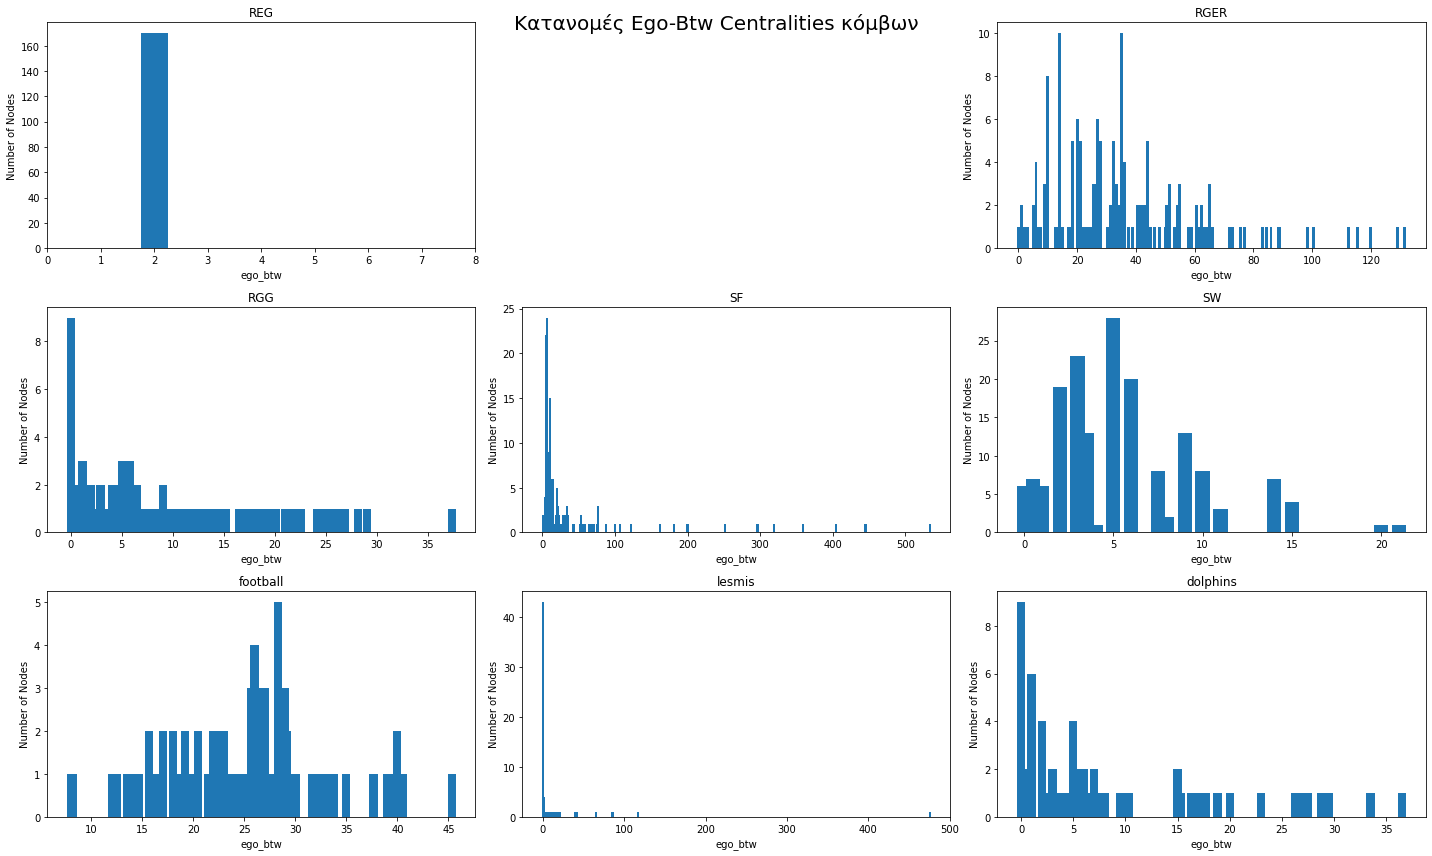

In [17]:
# Συνάρτηση υπολογισμού ενδιαμεσικών εγωκεντρικοτήτων ενός γράφου G
def calculate_ego_between_centrality(G):
  result = []
  for node in G:    
    ego = nx.ego_graph(G,node)                        # δημιουργία εγωδικτύου
    A = csr_matrix.toarray(nx.adj_matrix(ego))        # Α o πίνακας γειτνίασης του εγωδικτύου
    A2 = matrix_power(A,2)                            # Α2 = Α^2
    IA = np.ones((len(A),len(A))) - A                 # ΙΑ = 1-Α
    RES = np.multiply(A2,IA)                          # RES =  ο πολλαπλασιασμός Hadamard των A^2 με το (Ι-Α)
    TRI = np.triu(RES,1)                              # TRI = τριγωνικός του RES
    FIN = TRI[np.nonzero(TRI)]                        # FIN = περιέχει τις μη αρνητικές τιμές του τριγωνικού πίνακα
    centrality = 0
    for i in FIN:
      centrality = centrality + 1/i   
    result.append(centrality)
  return result                                       # Επιστρέφεται μια λίστα με όλες τις ενδιαμεσικές εγωκεντρικότητες των κόμβων

REG_ebtw = calculate_ego_between_centrality(REG)
RGER_ebtw = calculate_ego_between_centrality(RGER)
RGG_ebtw = calculate_ego_between_centrality(RGG)
SF_ebtw = calculate_ego_between_centrality(SF)
SW_ebtw = calculate_ego_between_centrality(SW)
football_ebtw = calculate_ego_between_centrality(football)
lesmis_ebtw = calculate_ego_between_centrality(lesmis)
dolphins_ebtw = calculate_ego_between_centrality(dolphins)

#Διαγράμματα Κατανομής Ego-Btw
fig, axs = plt.subplots(3,3,figsize=(20,12))
fig.suptitle("Κατανομές Ego-Btw Centralities κόμβων",fontsize = 20)

(a1,b1,c1) = plot_distribution(REG_ebtw)
axs[0,0].bar(a1, b1, width=0.5)
axs[0,0].set_xlim(0,8)
axs[0,0].set_title("REG")
axs[0,0].set_xlabel('ego_btw')
axs[0,0].set_ylabel('Number of Nodes')

(a2,b2,c2) = plot_distribution(RGER_ebtw)
axs[0,2].bar(a2, b2, width=1.0)
axs[0,2].set_title("RGER")
axs[0,2].set_xlabel('ego_btw')
axs[0,2].set_ylabel('Number of Nodes')

(a3,b3,c3) = plot_distribution(RGG_ebtw)
axs[1,0].bar(a3, b3, width=0.8)
axs[1,0].set_title("RGG")
axs[1,0].set_xlabel('ego_btw')
axs[1,0].set_ylabel('Number of Nodes')

(a4,b4,c4) = plot_distribution(SF_ebtw)
axs[1,1].bar(a4, b4, width=3)
axs[1,1].set_title("SF")
axs[1,1].set_xlabel('ego_btw')
axs[1,1].set_ylabel('Number of Nodes')

(a5,b5,c5) = plot_distribution(SW_ebtw)
axs[1,2].bar(a5, b5, width=0.8)
axs[1,2].set_title("SW")
axs[1,2].set_xlabel('ego_btw')
axs[1,2].set_ylabel('Number of Nodes')

(a6,b6,c6) = plot_distribution(football_ebtw)
axs[2,0].bar(a6, b6, width=0.8)
axs[2,0].set_title("football")
axs[2,0].set_xlabel('ego_btw')
axs[2,0].set_ylabel('Number of Nodes')

(a5,b5,c5) = plot_distribution(lesmis_ebtw)
axs[2,1].bar(a5, b5, width=3)
axs[2,1].set_title("lesmis")
axs[2,1].set_xlabel('ego_btw')
axs[2,1].set_ylabel('Number of Nodes')

(a5,b5,c5) = plot_distribution(dolphins_ebtw)
axs[2,2].bar(a5, b5, width=0.8)
axs[2,2].set_title("dolphins")
axs[2,2].set_xlabel('ego_btw')
axs[2,2].set_ylabel('Number of Nodes')

axs[0,1].axis('off')
fig.tight_layout()

In [18]:
# Υπολογισμός μέσης εγω-διαμεσικής κετρικότητας κάθε τοπολογίας
mean_ebtw_REG = np.mean(REG_ebtw)
mean_ebtw_RGER = np.mean(RGER_ebtw)
mean_ebtw_RGG = np.mean(RGG_ebtw)
mean_ebtw_SF = np.mean(SF_ebtw)
mean_ebtw_SW = np.mean(SW_ebtw)
mean_ebtw_football = np.mean(football_ebtw)
mean_ebtw_lesmis = np.mean(lesmis_ebtw)
mean_ebtw_dolphins = np.mean(dolphins_ebtw)

# Εκτυπώνουμε την μέση εγω-διαμεσική κετρικότητα κάθε τοπολογίας
print("Mean clustering coefficient REG: ",mean_ebtw_REG)
print("Mean clustering coefficient RGER:",mean_ebtw_RGER)
print("Mean clustering coefficient RGG: ",mean_ebtw_RGG)
print("Mean clustering coefficient SF:  ",mean_ebtw_SF)
print("Mean clustering coefficient SW:  ",mean_ebtw_SW)
print("")
print("Mean clustering coefficient football:",mean_ebtw_football)
print("Mean clustering coefficient lesmis:  ",mean_ebtw_lesmis)
print("Mean clustering coefficient dolphins:",mean_ebtw_dolphins)

Mean clustering coefficient REG:  2.0
Mean clustering coefficient RGER: 36.68235294117647
Mean clustering coefficient RGG:  8.636176470588234
Mean clustering coefficient SF:   37.826764705882354
Mean clustering coefficient SW:   5.476470588235294

Mean clustering coefficient football: 24.722132505175978
Mean clustering coefficient lesmis:   13.31846011131725
Mean clustering coefficient dolphins: 8.517473118279568


<u>Σύγκριση πραγματικών με συνθετικών κατανομών</u>

*   **football**: Παρατηρούμε ότι υπάρχουν κεντρικές τιμές του Ego-Btw Centrality που τις έχουν οι περισσότεροι κόμβοι και λιγότεροι κατανέμονται στις τιμές γύρω από τις κεντρικές. Γενικά οι τιμές κυμαίνονται σε σχετικά μικρά επίπεδα δηλαδή από 5 μέχρι 45, με την μέση τιμή να είναι το 24.7.

*   **lesmis**: Παρατηρούμε ότι σχεδόν όλοι οι κόμβοι έχουν τιμή μηδέν ή πολύ κοντά στο μηδέν. Επιπλέον, υπάρχουν λίγοι κόμβοι οι οποίοι έχουν αρκετά μεγάλη τιμή της κεντρικότητας κοντά στο 500. Αυτό το φαινόμενο της μεγάλης συσσώρευσης κοντά σε χαμηλές κεντρικότητες και ελάχιστα δείγματα με μεγάλες τιμές, το παρατηρούμε ξεκάθαρα στα Scale Free δίκτυα. Αυτές οι ακραίες τιμές κεντρικοτήτων (500) είναι που αυξάνουν και την μέση τιμή (13.31), όπως συμβαίνει και στο συνθετικό SF.

*   **dolphins**: Παρατηρούμε ότι αρκετοί από τους κόμβους έχουν εγω-κεντρικότητα κοντά στο μηδέν, ενώ οι υπόλοιποι κατανέμονται ομοιόμορφα σε όλο το μήκος τιμών μέχρι και την τιμή 36. Η μέση τιμή είναι 8.5. Αυτό το φαινόμενο της μεγάλης συχνότητας κόμβων στο μηδέν, αλλά και της ομοίμορφης τιμής των υπολοίπων σε σχετικά μικρά μεγέθη κεντρικοτήτων, το παρατηρούμε όπως βλέπουμε και από τα παραπάνω διαγράμματα για RGG δίκτυα.

###6 . Σχόλια - Συμπεράσματα 

Καταληκτικά, με βάση τις παραπάνω μετρικές, τα αποτελέσματα των διαγραμμάτων και τα σχόλια που κάναμε ξεχωριστά για κάθε μια μετρική, καταλήγουμε στα εξής συμπεράσματα:

*   **football**: Θα χαρακτηρίζαμε τον τύπο του συγκεκριμένου γράφου παρόμοιο με ένα **REG** συνθετικό δίκτυο. To football περιέχει το δίκτυο των αμερικανικών ποδοσφαιρικών αγώνων μεταξύ των κολλεγίων Division IA κατά τη διάρκεια της κανονικής σεζόν Φθινόπωρο 2000, όπως συντάχθηκε από τους M. Girvan και M. Newman. Οι κόμβοι έχουν τιμές (labels) που δείχνουν σε ποια περιφέρεια (conference) ανήκουν. Σύμφωνα με το .txt αρχέιο, τα labels είναι 12 στον αριθμό (0-11). Επομένως, λογικό είναι το δίκτυο να μοιάζει με REG, αφού οι ομάδες έπαιξαν περίπου τον ίδιο αριθμό αγώνων και άρα ο βαθμός των κόμβων είναι περίπου σταθερός.

*   **lesmis**: Θα χαρακτηρίζαμε τον τύπο του συγκεκριμένου γράφου παρόμοιο με ένα **SF** συνθετικό δίκτυο. Το lesmis περιέχει το δίκτυο με βάρη συνεμφανίσεων χαρακτήρων (coappearances) στο μυθιστόρημα του Victor Hugo "Les Miserables". Οι κόμβοι αντιπροσωπεύουν χαρακτήρες όπως υποδεικνύονται από τις ετικέτες (labels) και οι ακμές συνδέουν οποιοδήποτε ζεύγος χαρακτήρων που εμφανίζονται στο ίδιο κεφάλαιο του βιβλίου. Οι τιμές στις ακμές είναι ο αριθμός τέτοιων συνυπάρξεων. Επομένως, λογικό είναι το δίκτυο να έχει την μορφή Scale Free, αφού λίγοι χαρακτήρες (πρωταγωνιστής, συνπρωταγωνιστής) θα συνηπάρξουν σχεδόν με όλους τους υπόλοιπους, ενώ οι πλειοψηφία των υπόλοιπων χαρακτήρων θα συνεμφανιστούν με λίγους.

*   **dolphins**: Θα χαρακτηρίζαμε τον τύπο του συγκεκριμένου γράφου παρόμοιο με ένα **RGG** συνθετικό δίκτυο. Το dolphins, περιέχει ένα μη κατευθυνόμενο κοινωνικό δίκτυο συχνών συσχετίσεων μεταξύ 62 δελφινιών σε μια κοινότητα στη Νέα Ζηλανδία. Επομένως, λογικό είναι το δίκτυο να έχει μορφή παρόμοια με Random Geometric Graph, αφού οι συσχετίσεις των δελφινιών έχουν να κάνουν ξεκάθαρα με τον τόπο-περιοχή στην οποία ζουν και κινούνται.





##B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων
<p>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<p>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία υπολογίστε το modularity χρησιμοποιώντας τη συνάρτηση <a style=text-decoration:none href='https://networkx.github.io/documentation/stable/_modules/networkx/algorithms/community/quality.html'>modularity</a>.</p>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

###1 . Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.

In [19]:
# Δημιουργία λίστας από χρώματα που θα την χρειαστούμε παρακάτω για τον χρωματισμό των nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

# Αφαιρούμε το λευκό χρώμα διότι "μπερδεύει" παρακάτω στην απεικόνιση
colors.remove('w')

###2 . Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.

In [21]:
# Συνάρτηση που παίρνει σαν ορίσματα έναν γράφο G και τον μέγιστο αριθμό κοινότητων k
# και επιστρέφει το μέγιστο modularity, τον αριθμό των κοινοτήτων και τη λίστα με τις κοινότητες

def comd_GN(G,k):

  # Αρχικοποίηση μέγιστου modularity
  max_mod = 0

  # Δημιουργία κοινοτήτων με τη μέθοδο Newman-Girvan
  comp = nx.algorithms.community.centrality.girvan_newman(G)

  # Αναζήτηση κοινότητας με το μέγιστο modularity
  for communities in itertools.islice(comp,k):
    modularity = nx.algorithms.community.quality.modularity(G, communities)
    if (modularity > max_mod):
      max_mod = modularity
      best_comms = communities
  
  # Επιστροφή μέγιστου modularity, αριθμό των κοινοτήτων, και τη λίστα με τις κοινότητες
  return max_mod, len(best_comms), best_comms

###3 . Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.

In [22]:
# Συνάρτηση που παίρνει σαν όρισμα έναν γράφο, τον επιθυμητό αριθμό κοινοτήτων, τα assign_labels
# και επιστρέφει το modularity και τις κοινότητες με την μορφή που το θέλει η συνάρτηση modularity του networkx

def search(G, clusters, labels):

  # Δημιουργία του np adjcency matrix που το χρειάζεται η SpectralClustering του scikit learn
  X = nx.to_numpy_matrix(G)

  # Κάνουμε fit τον ταξινομητή μας στα δεδομένα του πίνακα
  clustering = SpectralClustering(n_clusters=clusters, assign_labels=labels, affinity = 'precomputed').fit(X)
  
  # Δημιουργία dictionary με keys τα nodes και values τις κοινότητες που προέβλεψε το clustering
  res = dict(zip(list(G.nodes()), clustering.labels_))
  
  # Αρχικοποίηση λίστας κοινοτήτων
  communities=[]

  # Δημιουργία της τελικής λίστας με την μορφή που το θέλει η συνάρτηση modularity του networkx
  for i in range(clusters):
    communities.append({node for node,label in res.items() if label == i})
  
  # Επιστρέφει το modularity και την λίστα κοινοτήτων
  return nx.algorithms.community.quality.modularity(G,communities), communities


# Συνάρτηση που παίρνει σαν όρισμα έναν γράφο και τον μέγιστο αριθμό κοινοτήτων,
# ελέγχει όλες τις δυνατές περιπτώσεις αριθμου k και αλγορίθμων μέσω της search(),
# και επιστρέφει το μέγιστο modularity, τον αριθμό των κοινοτήτων και τη λίστα με τις κοινότητες

def comd_SP(G,k):

  # Αρχικοποίηση μέγιστου modularity
  max_modularity = 0
  
  # Εύρεση κοινοτήτων με το μέγιστο modularity ελέγχοντας και τον kmeans και το discretize μέσω της συνάρτησης search()
  for clusters in range(1,k+1):
    for labels in ['kmeans', 'discretize']:
      modularity, communities = search(G, clusters, labels)
      if (modularity > max_modularity):
        max_modularity = modularity
        best_comms = communities
        best_lab = labels
  
  # Επιστροφή μέγιστου modularity, αριθμό των κοινοτήτων, και τη λίστα με τις κοινότητες
  return max_modularity, len(best_comms), best_comms

###4 . Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.

In [23]:
# Συνάρτηση που παίρνει σαν ορίσματα έναν γράφο G
# και επιστρέφει το μέγιστο modularity, τον αριθμό των κοινοτήτων και τη λίστα με τις κοινότητες
def comd_MM(G):
  communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
  modularity = nx.algorithms.community.quality.modularity(G,communities)
  return modularity, len(communities), communities

###5 . Οπτικοποίηση κοινοτήτων σε συνθετικά και πραγματικά δίκτυα.</h4>

In [24]:
# Συνάρτηση που παίρνει σαν όρισμα ένα γράφο G και το όνομα του γράφου
# και εμφανίζει τον γράφο με τις κοινότητες που προκύπτουν από τις προηγούμενες μεθόδους

def visual_com(G, title):

  # Δημιουργία κοινοτήτων με μέθοδο GN, SP, MM
  mod1, k1, com1 = comd_GN(G, 50)
  mod2, k2, com2 = comd_SP(G, 50)
  mod3, k3, com3 = comd_MM(G)
  
  # Δημιουργία figure, τίτλου και position
  fig, axs = plt.subplots(2,2,figsize=(20,15))
  fig.suptitle(title, fontsize=22)
  
  if (title=="REG" or title=="RGER" or title=="SW" or title=="SF"):
    pos = nx.circular_layout(G)
    size = 50
  else:
    pos = nx.spring_layout(G)
    size = 100

  # Απεικόνιση αρχικού γράφου
  nx.draw_networkx_nodes(G,pos, node_size=size, ax=axs[0][0])
  nx.draw_networkx_edges(G,pos, alpha=0.3, ax=axs[0][0])
  axs[0][0].set_title("Initial Graph")

  # Απεικόνιση κοινοτήτων με τη μέθοδο Newman-Girvan
  acc=0
  for i in com1:
    nx.draw_networkx_nodes(G,pos, nodelist=i, node_color=colors[acc], node_size=size, ax=axs[0][1])
    acc = acc+1
  nx.draw_networkx_edges(G,pos,alpha=0.3, ax=axs[0][1])
  axs[0][1].set_title("Newman-Girvan, k = "+str(k1)+", modularity = "+str(round(mod1,6)))

  # Απεικόνιση κοινοτήτων με τη μέθοδο Spectral Clustering
  acc=0
  for i in com2:
    nx.draw_networkx_nodes(G,pos, nodelist=i, node_color=colors[acc], node_size=size, ax=axs[1][0])
    acc = acc+1
  nx.draw_networkx_edges(G,pos,alpha=0.3, ax=axs[1][0])
  axs[1][0].set_title("Spectral Clustering, k = "+str(k2)+", modularity = "+str(round(mod2,6)))

  # Απεικόνιση κοινοτήτων με τη μέθοδο Modularity Maximization
  acc=0
  for i in com3:
    nx.draw_networkx_nodes(G,pos, nodelist=i, node_color=colors[acc], node_size=size, ax=axs[1][1])
    acc = acc+1
  nx.draw_networkx_edges(G,pos,alpha=0.3, ax=axs[1][1])
  axs[1][1].set_title("Modularity Maximization, k = "+str(k3)+", modularity = "+str(round(mod3,6)))

  plt.show()

####a. Οπτικοποίηση κοινοτήτων Les Miserables.

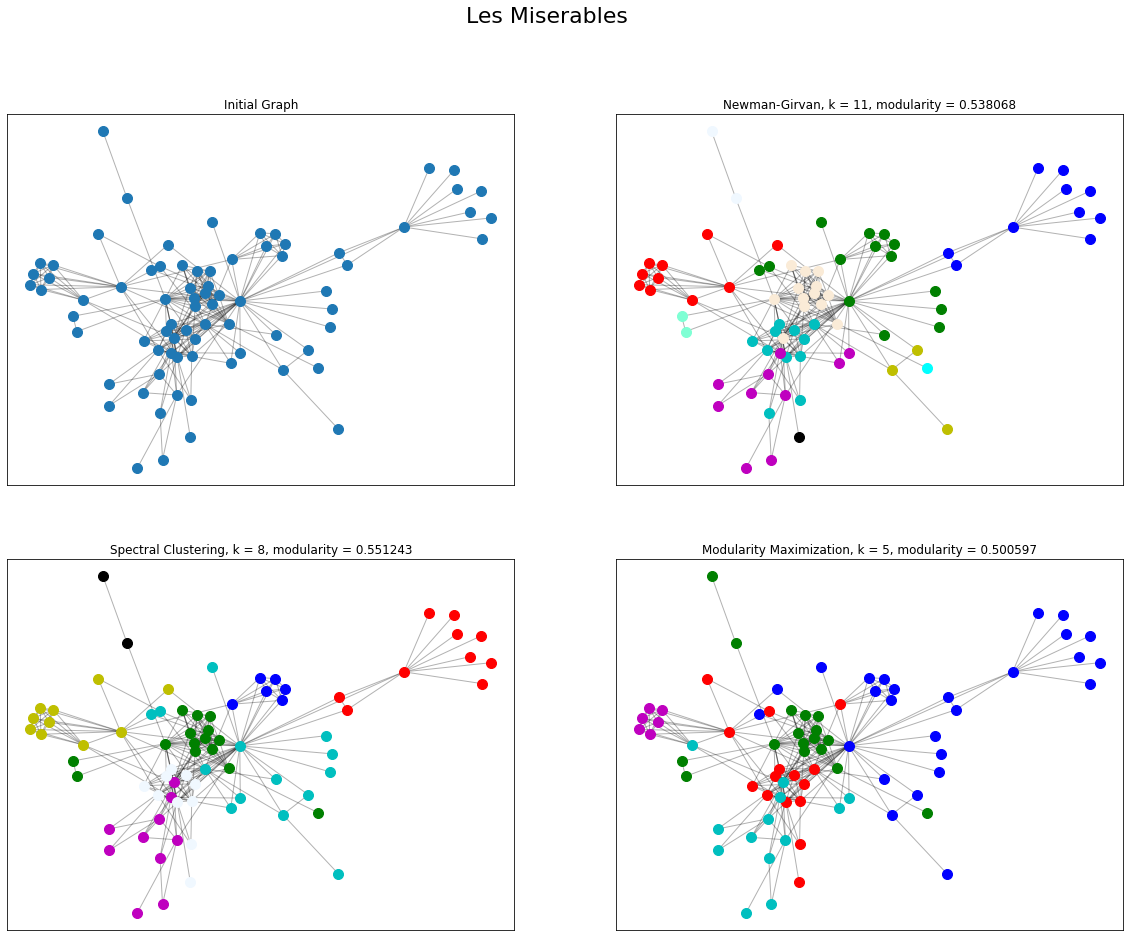

In [25]:
visual_com(lesmis, "Les Miserables")

<u>Συμπέρασμα</u>: Από τις τρεις μεθόδους, η **Spectral Clustering** είναι αυτή που έχει πετύχει το μεγαλύτερο modularity (0.551), με αριθμό κοινοτήτων **k=8**.

####b. Οπτικοποίηση κοινοτήτων American College Football.

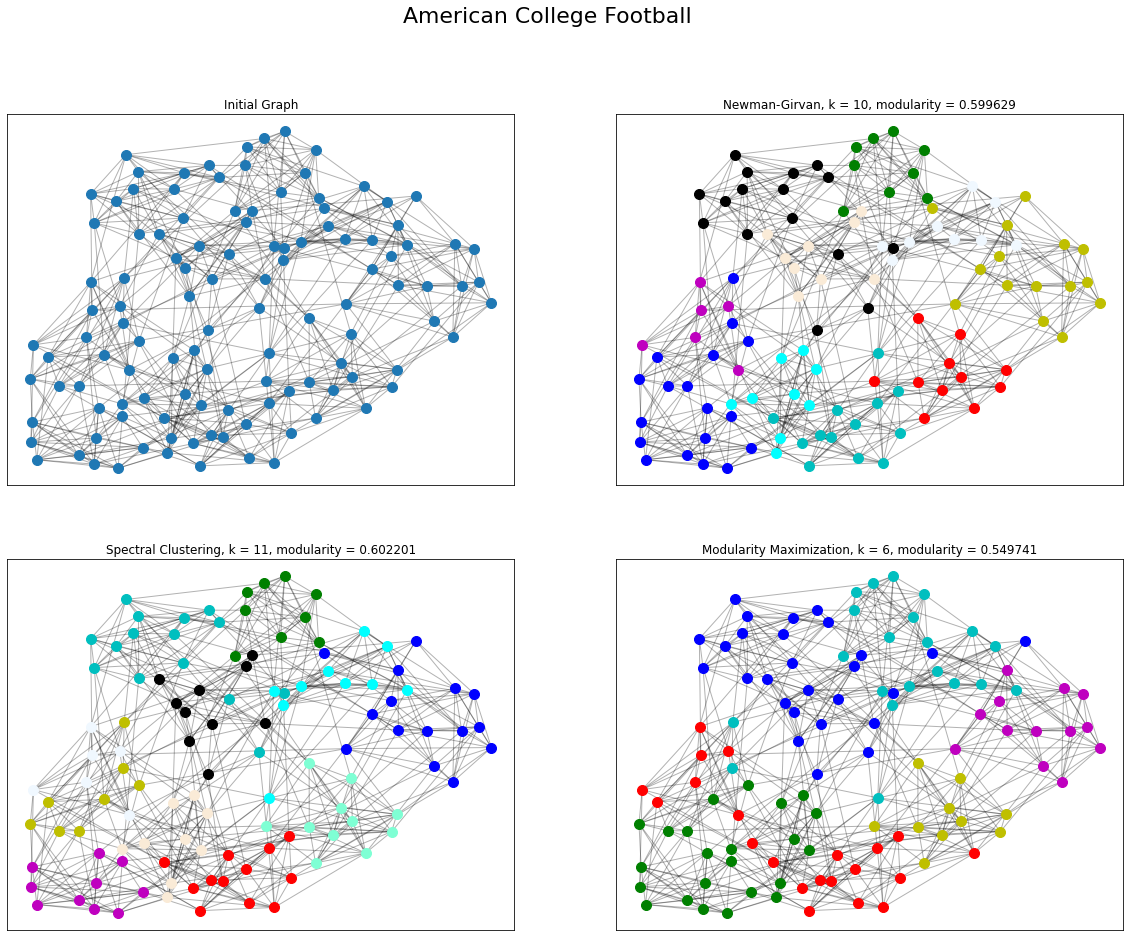

In [26]:
visual_com(football, "American College Football")

<u>Συμπέρασμα</u>: Από τις τρεις μεθόδους, η **Spectral Clustering** είναι αυτή που έχει πετύχει το μεγαλύτερο modularity (0.602), με αριθμό κοινοτήτων **k=11**. Παρόμοια τιμή (0.599) έχει πετύχει και η μέθοδος Newman-Girvan με αριθμό κοινοτήτων k=10.

####c. Οπτικοποίηση κοινοτήτων Dolphins.

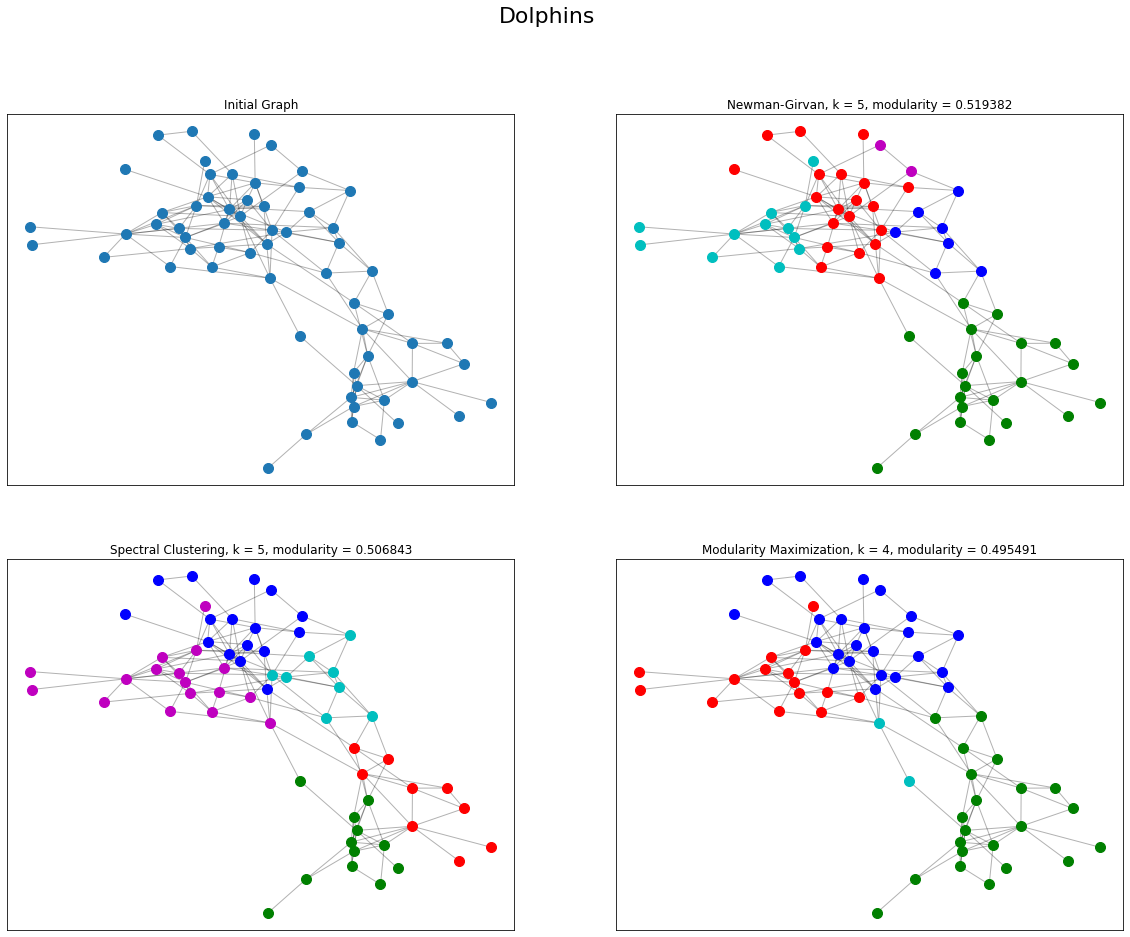

In [27]:
visual_com(dolphins, "Dolphins")

<u>Συμπέρασμα</u>: Από τις τρεις μεθόδους, η **Newman-Girvan** είναι αυτή που έχει πετύχει το μεγαλύτερο modularity (0.519), με αριθμό κοινοτήτων **k=5**. Τον ίδιο αριθμό κοινοτήτων έχει εξάγει και η Spectral Clustering με λίγο χαμηλότερο modularity (0.506).
<br><br>
Στα πραγματικά δίκτυα, παρατηρούμε λοιπόν, ότι η μέθοδος Modularity Maximization αποδείχθηκε η "χειρότερη" από τις τρεις (μικρότερο modularity) με τον μικρότερο αριθμό κονοτήτων k από τις τρεις. Αντίθετα, οι άλλες δύο μέθοδοι κατέληξαν σε παρόμοιο αριθμό κοινοτήτων k και σε παρόμοιο σχετικά modularity.

####d. Οπτικοποίηση κοινοτήτων REG.

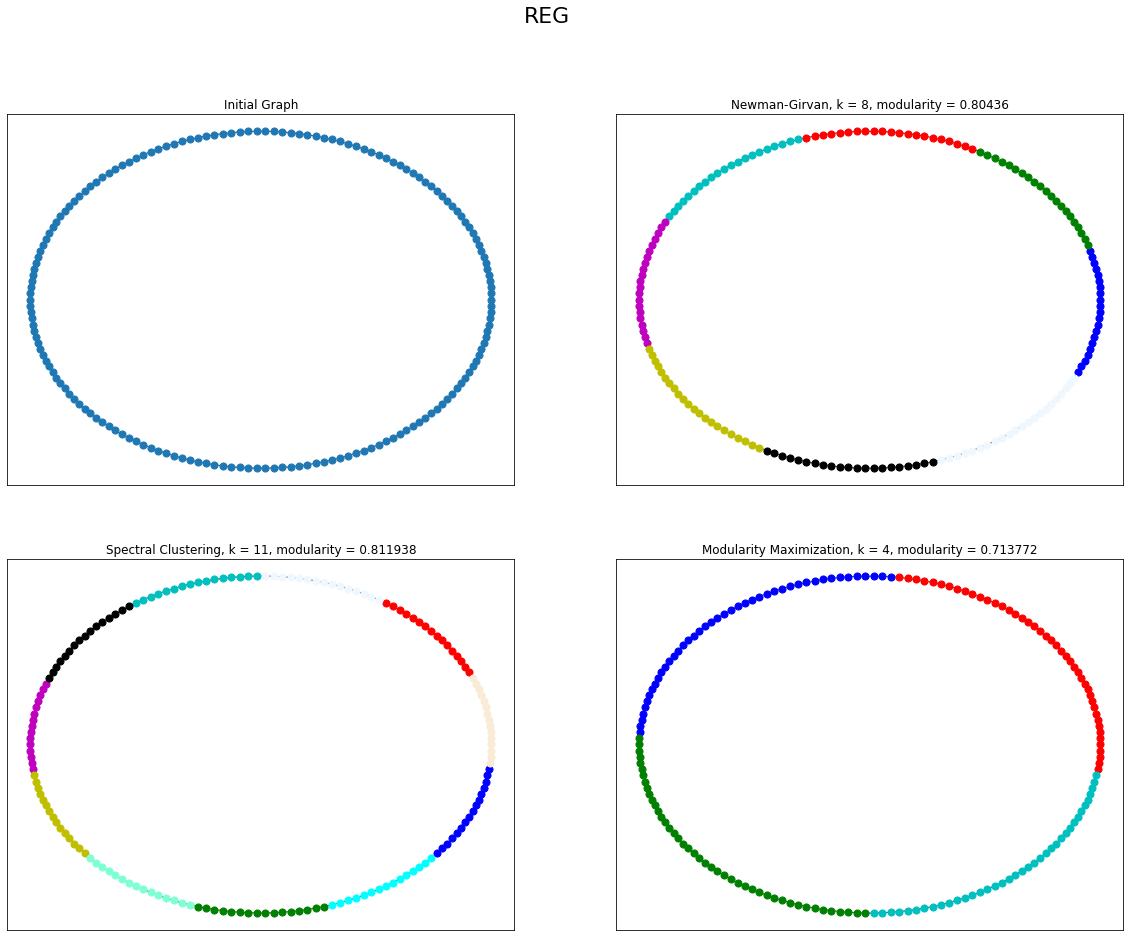

In [ ]:
visual_com(REG, "REG")

<u>Συμπέρασμα</u>: Για Regular Graphs παρατηρούμε ότι έχουμε μια ομοιομορφία κοινοτήτων αφού έχουν οι κόμβοι σταθερό αριθμό γειτόνων. Το modularity κυμαίνεται σε υψηλή τιμή, γύρω στο 0.8, για αριθμό κοινοτήτων 8 και 11.

####e. Οπτικοποίηση κοινοτήτων RGER.

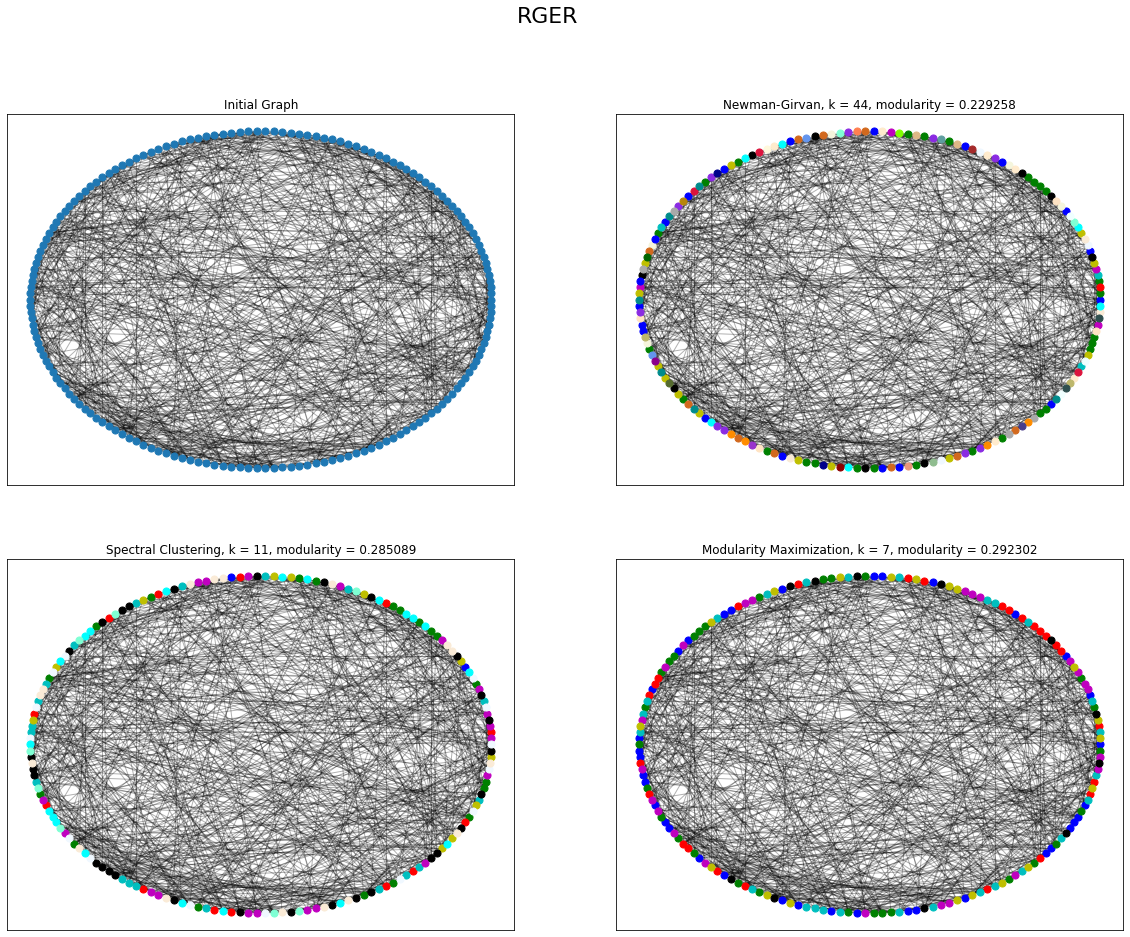

In [ ]:
visual_com(RGER, "RGER")

<u>Συμπέρασμα</u>: Για Random Graphs παρατηρούμε σχετικά χαμηλές τιμές του modularity (0.29) και αρκέτα μεγάλη απόκλιση στον αριθμό των κοινοτήτων που βρίσκουν οι διαφορετικές μέθοδοι μεταξύ τους. Συγκεκριμένα έχουμε k = 7, 11 και 44.

####f. Οπτικοποίηση κοινοτήτων RGG.

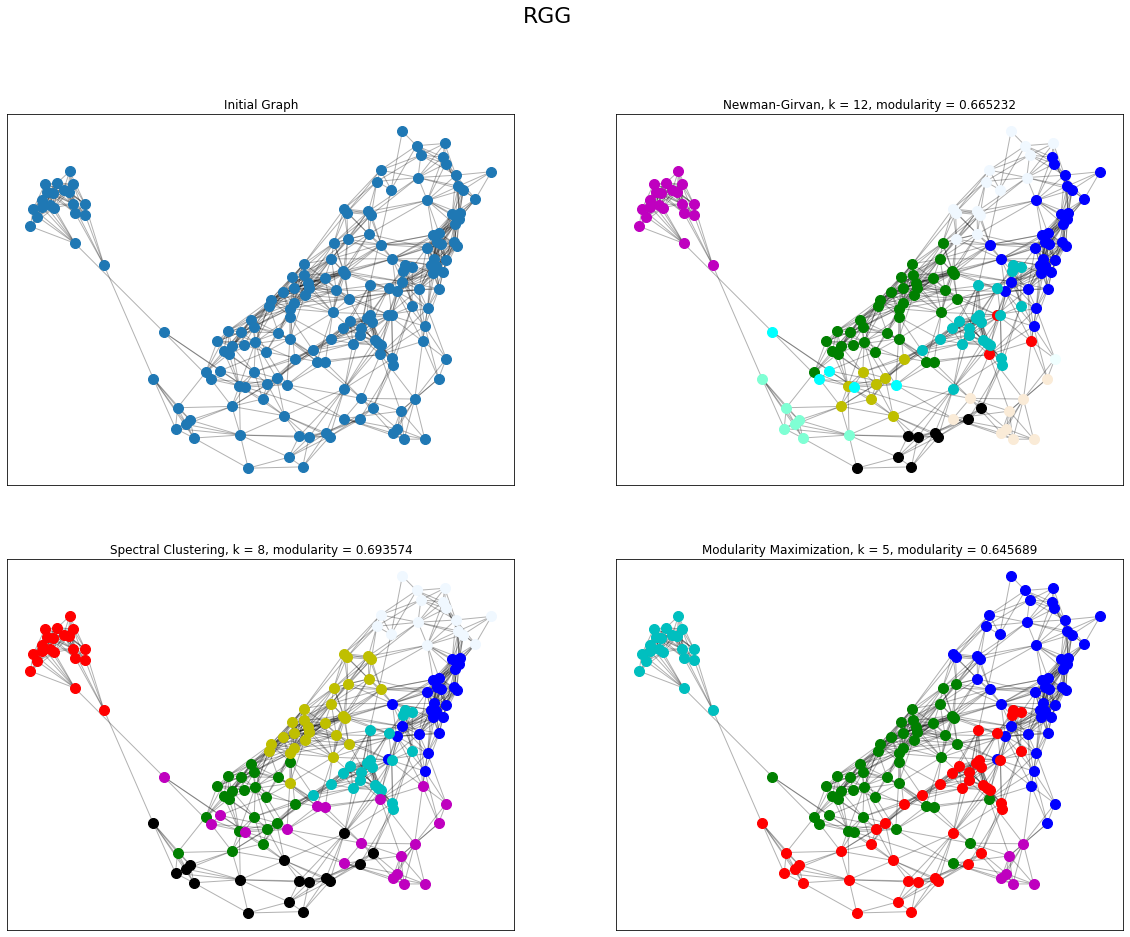

In [ ]:
visual_com(RGG, "RGG")

<u>Συμπέρασμα</u>: Για Random Geometric Graph παρατηρούμε σχετικά συμπαθητική τιμή του modularity (0.69) με αριθμό κοινοτήτων 5, 8, 12 που σχετικά ταιριάζει όπως βλέπουμε και με την θέση του κάθε κόμβου στο πλαίσιο LxL. Δηλαδή, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου.

####g. Οπτικοποίηση κοινοτήτων SW.

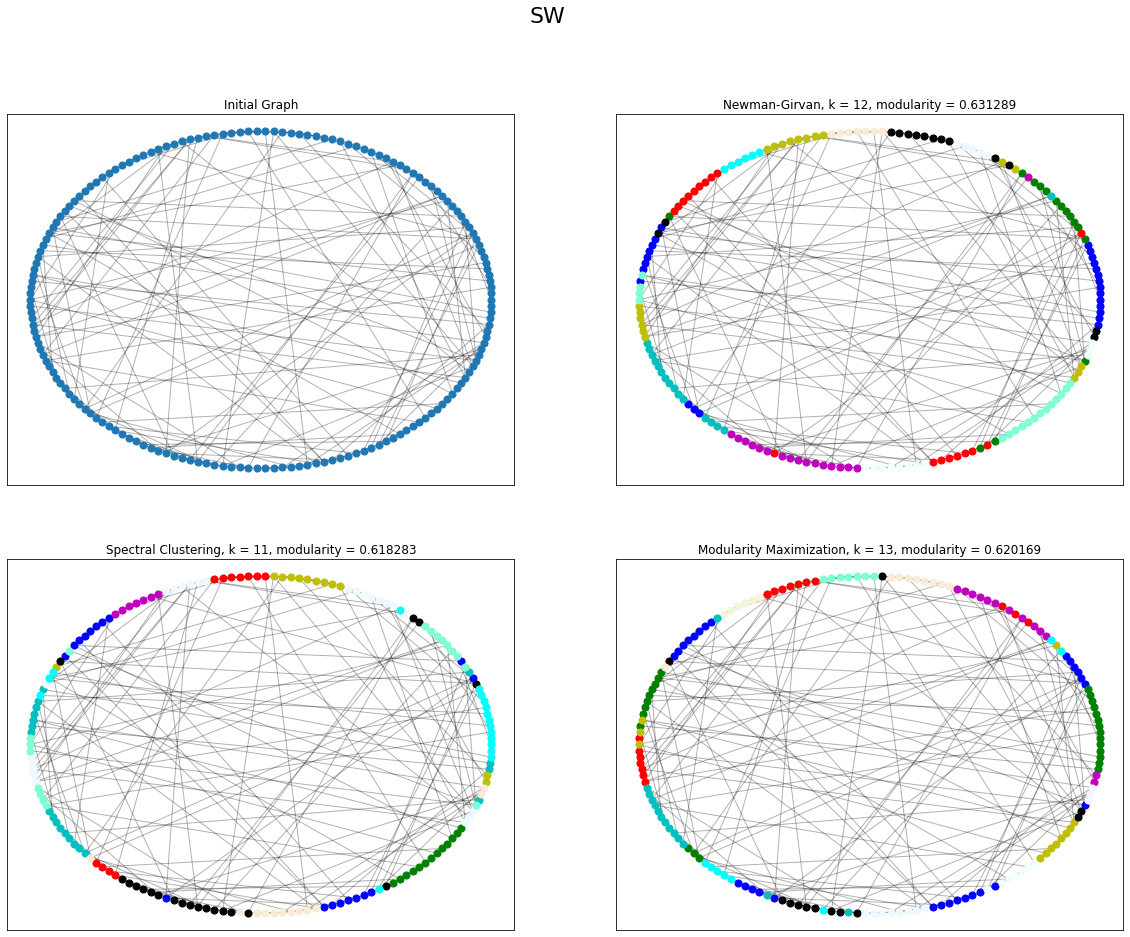

In [ ]:
visual_com(SW, "SW")

<u>Συμπέρασμα</u>: Για Small World δίκτυο παρατηρούμε ότι και οι τρεις μέθοδοι έχουν βγάλει παρόμοια τιμή modularity, γύρω στο 0.62, με παρόμοιο αριθμό κοινοτήτων k = 11, 12, 13. Τα παραπάνω διαγράμματα θυμίζουν λίγο το REG, με την διαφορά τώρα ότι αυτές οι εξτρά ακμές ανασύνδεσης (shortcuts), σπάνε την ομοιμορφία του REG και προσθέτουν και τους "απέναντι" στην εξάστοτε κοινότητα. Όσο περισσότερο αυξάνεται η πιθανότητα ανασύσδεσης, τόσο απομακρυνόμαστε από το REG (πέφτει το modularity) και πλησιάζουμε τα αποτελέσματα του RGER.

####h. Οπτικοποίηση κοινοτήτων SF.

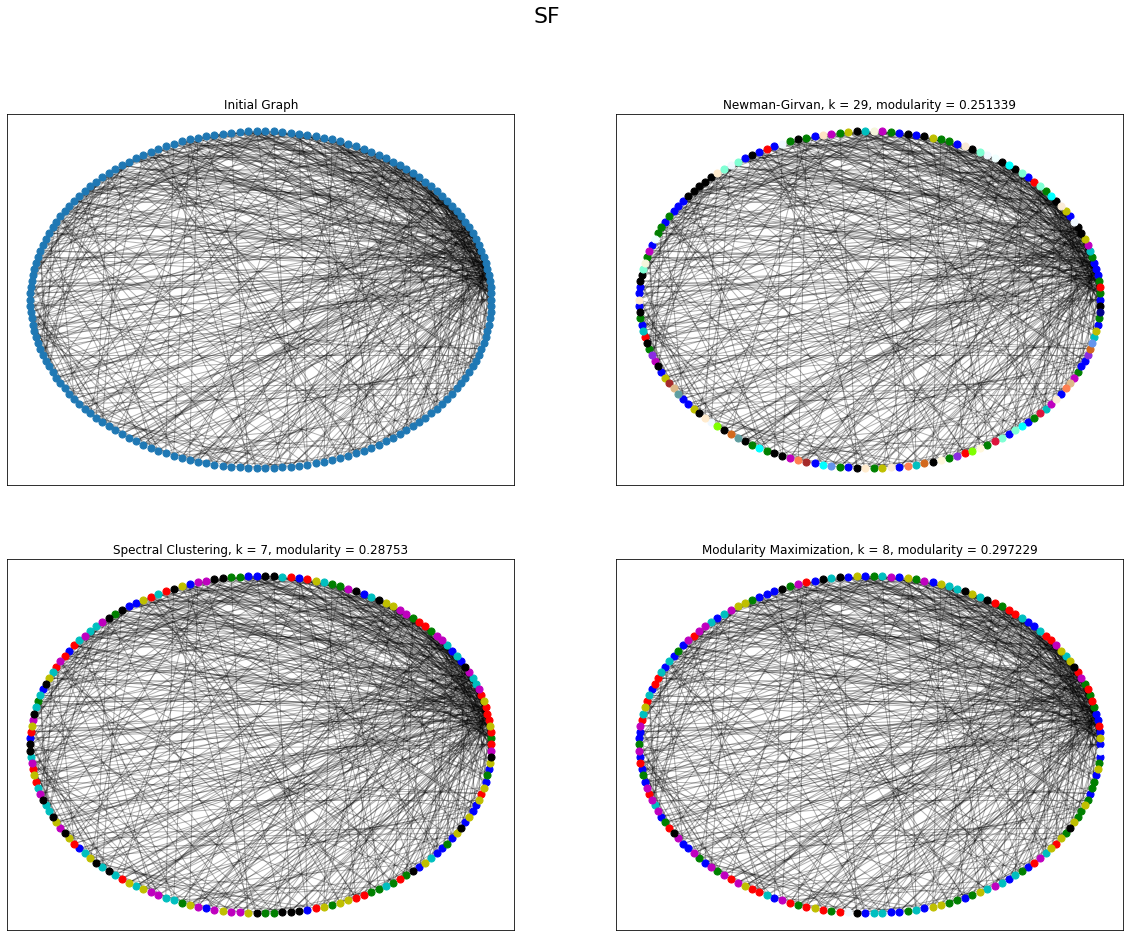

In [ ]:
visual_com(SF, "SF")

<u>Συμπέρασμα</u>: Για Scale Free δίκτυο παρατηρούμε σχετικά χαμηλές τιμές του modularity, αλλά λίγο καλύτερες από του RGER. Έχουμε όπως και στον RGER αρκέτα μεγάλη απόκλιση στον αριθμό των κοινοτήτων μεταξύ των τριών μεθόδων. Συγκεκριμένα έχουμε k = 7, 8 και 29. Παρατηρούμε κι εδώ ότι η Newman-Girvan μέθοδος, παρόλο που σχηματίζει κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό, δεν ανταποκρίνεται πολύ καλά, αφού έχει αρκετά υψηλό αριθμό κοινοτήτων με χαμηλό modularity. *(Μου θυμίζει overfitting, χωρίς να είμαι σίγουρος ότι πρόκειται για ακριβώς τέτοιο φαινόμενο)*.

###5 . Σχόλια - Συμπεράσματα

Οι τρείς μέθοδοι που χρησιμοποιήσαμε για τον εντοπισμό κοινοτήτων είναι οι εξής:

*   **Newman-Girval**: Ο αλγόριθμος Girvan – Newman είναι μια Hierarchy-Centric μέθοδος που ανιχνεύει κοινότητες αφαιρώντας σταδιακά ακμές από το αρχικό γράφημα. Ο αλγόριθμος, σε κάθε βήμα, αφαιρεί την "πιο πολύτιμη" ακμή, συνήθως αυτήν με την υψηλότερη edge betweeness centrality. Καθώς το γράφημα διασπάται σε κοινότητες, η συμπαγής δομή του γράφου "σπάει" και το αποτέλεσμα μπορεί να απεικονιστεί ως δενδρόγραμμα. Στο τέλος της διαδικασίας επιλέγουμε την διάσπαση αυτή με το μεγαλύτερο modularity.

*   **Spectral Clustering**: Η Spectral Clustering είναι μια Network-Centric μέθοδος, η οποία παίρνοντας σαν όρισμα τον επιθυμητό αριθμό των κοινοτήτων k και χρησιμοποιώντας τα ιδιοδιανύσματα του graph Laplacian πίνακα μαζί με κάποιον αλγόριθμο (συνήθως k-means), τοποθετεί κάθε κόμβο στην κατάλληλη κοινότητα. Εμείς πάλι, παίρνοντας όλες τις δυνατές περιπτώσεις για το k στο διάστημα [1,50] και δύο είδη αλγορίθμων (kmeans, discretize), επιλέγουμε αυτό το k με το μεγαλύτερο modularity.

*   **Modularity Maximization**: Η Clauset-Newman-Moore greedy Modularity Maximization είναι μια Network-Centric μέθοδος η οποία εντοπίζει κοινότητες σε έναν γράφο G. Συγκεκριμένα, ξεκινά με κάθε κόμβο στη δική του κοινότητα (N κόμβοι -> Ν κοινότητες) και ενώνει σταδιακά το ζεύγος των κοινοτήτων που αυξάνει περισσότερο τo modularity έως ότου δεν υπάρχει τέτοιο ζεύγος. Στο τέλος επιλέγεται από τον αλγόριθμο το ζεύγος με το μεγαλύτερο modularity.

Η μετρική που χρησιμοποιήσαμε για να συγκρίνουμε τις μεθόδους, αλλά και τα διαφορετικά είδη γράφων μεταξύ τους είναι η παρακάτω:

*   **Modularity**: Μετράει την "δύναμη" μιας κοινότητας λαμβάνοντας υπόψη την κατανομή βαθμών κόμβου. Κυμαίνεται από ‐1 έως 1 και μια μεγαλύτερη τιμή υποδηλώνει και καλύτερη κοινοτική δομή στο γράφο. Η εύρεση της διάσπασης σε κοινότητες με το μέγιστο modularity σε ένα γράφημα είναι NP πλήρες πρόβλημα. Ωστόσο, υπάρχουν καλοί προσεγγιστικοί αλγόριθμοι, όπως το Modularity Maximization.

Καταληκτικά, με βάση τις παραπάνω τρεις μεθόδους, τις απεικονίσεις των γράφων και τα σχόλια που κάναμε ξεχωριστά για κάθε ένα δίκτυο, καταλήγουμε στα εξής συμπεράσματα:


*   **football**: Στο δίκτυο football, που αναφέραμε ότι έχει αρκετά χαρακτηριστικά ενός REG, η Spectral Clustering είναι αυτή που έχει πετύχει το μεγαλύτερο modularity (0.602), με αριθμό κοινοτήτων k=11. Ο αριθμός αυτός είναι κοντά στον αριθμό 12 των περιφερειών (conference) που ανήκουν οι κόμβοι που πιθανόν να ήταν ο βέλτιστος χωρισμός. Η ίδια μέθοδος αποδείχτηκε η καλύτερη και στον συνθετικό γράφο REG με αρκετά υψηλή τιμή modularity.

*   **lesmis**: Στο δίκτυο lesmis, η Spectral Clustering είναι αυτή που έχει πετύχει το μεγαλύτερο modularity (0.551), με αριθμό κοινοτήτων k=8. Όπως είχαμε αναφέρει, έχει αρκετά χαρακτηριστικά με ένα Scale Free δίκτυο και αυτό φαίνεται και από την απεικόνιση των κοινοτήτων, καθώς σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο σχετικά βαθμό.

*   **dolphins**: Στο δίκτυο dolphins, η Newman-Girvan είναι αυτή που έχει πετύχει το μεγαλύτερο modularity (0.519), με αριθμό κοινοτήτων k=5. Έχει χαρακτηριστικά ενός RGG και αυτό φάνηκε και από την απεικόνιση των κοινοτήτων, καθώς υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο (γειτονιά) που δημιουργείται με βάση τις αποστάσεις από τους υπόλοιπους κόμβους του δικτύου.






